# Trabalho de Recuperação de Informação
## Desenvolvido por Ronald Albert

In [ ]:
import regex as re
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [ ]:
def normalize(doc):
    return doc.lower()

In [ ]:
def tokenize(doc, sep_list):
    default_sep = sep_list[0]
    
    for sep in sep_list[1:]:
        doc = doc.replace(sep, default_sep)
        
    doc = re.sub(r"\s+", " ", doc)
    doc = doc.strip()

    tokens = doc.split(default_sep)
    return tokens


In [ ]:
def eliminate_stopwords(tokens, stopwords):
    return [token for token in tokens if token not in stopwords]

In [ ]:
def clean_doc(doc, sep_list, stopwords):
    doc = normalize(doc)
    tokens = tokenize(doc, sep_list)
    tokens = eliminate_stopwords(tokens, stopwords)
    
    return tokens

In [ ]:
def incidence_matrix(docs):
    token_set = set()
    
    for doc in docs:
        for token in doc:
            token_set.add(token)
    
    doc_list = list(range(0, len(docs)))
    
    incidence_matrix = pd.DataFrame(columns=doc_list)
    
    for token in token_set:
        token_series = pd.Series(index=doc_list, dtype='object')
        
        for index,value in token_series.iteritems():
            token_series[index] = docs[int(index)].count(token)/len(docs[int(index)])
        
        incidence_matrix = incidence_matrix.append(token_series, ignore_index=True)
        
    incidence_matrix.index = token_set
    return incidence_matrix

In [ ]:
M=[['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios'],
['Green Book, Roma e Bohemian Rhapsody são os principais vencedores do Oscar 2019'],
['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite'],
['Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia'],
['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro'],
['Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.'],
['Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América'],
['Oscar 2020: saiba como é a escolha dos jurados e como eles votam'],
['Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?'],
['IFAL-Maceió convoca aprovados em lista de espera do SISU para chamada oral'],
['Arrascaeta e Matías Viña são convocados pelo Uruguai para eliminatórias da Copa. Além deles, há outros destaques na lista.'],
['Oscar do Vinho: confira os rótulos de destaque da safra 2018'],
['Parasita é o vencedor da Palma de Ouro no Festival de Cannes'],
['Estatísticas. Brasileirão Série A: Os artilheiros e garçons da temporada 2020'],
['Setembro chegou! Confira o calendário da temporada 2020/2021 do futebol europeu']] #conjunto de documentos

stopwords=['a', 'o', 'e', 'é', 'de', 'do', 'da', 'no', 'na', 'são', 'dos', 'com','como',
'eles', 'em', 'os', 'ao', 'para', 'pelo'] #lista de stopwords

q='oscar 2020' #consulta

separadores=[' ',',','.','!','?',':',';','/'] #separadores para tokenizacao

In [ ]:
M_cleaned = [clean_doc(doc[0], separadores, stopwords) for doc in M]
M_cleaned

[['parasita', 'grande', 'vencedor', 'oscar', '2020', 'quatro', 'prêmios'],
 ['green',
  'book',
  'roma',
  'bohemian',
  'rhapsody',
  'principais',
  'vencedores',
  'oscar',
  '2019'],
 ['oscar',
  '2020',
  'confira',
  'lista',
  'completa',
  'vencedores',
  'parasita',
  '1917',
  'foram',
  'grandes',
  'vencedores',
  'noite'],
 ['boa', 'fase', 'oscar', 'sonha', 'jogar', 'copa', 'mundo', 'rússia'],
 ['conheça',
  'indicados',
  'oscar',
  '2020',
  'cerimônia',
  'premiação',
  'acontece',
  'fevereiro'],
 ['oscar',
  'schmidt',
  'receberá',
  'troféu',
  'prêmio',
  'brasil',
  'olímpico',
  '2019',
  'jogador',
  'basquete',
  'mais',
  'pontos',
  'jogos',
  'olímpicos'],
 ['seleção',
  'brasileira',
  'vai',
  'observar',
  '35',
  '40',
  'jogadores',
  'definir',
  'lista',
  'copa',
  'américa'],
 ['oscar', '2020', 'saiba', 'escolha', 'jurados', 'votam'],
 ['bem',
  'amigos',
  'discute',
  'lista',
  'seleção',
  'galvão',
  'dá',
  'recado',
  'tite',
  'cadê',
  'lu

In [ ]:
freq_matrix = incidence_matrix(M_cleaned)
freq_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
35,0.000000,0.000000,0.0,0.0,0.000,0.0,0.090909,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
roma,0.000000,0.111111,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
40,0.000000,0.000000,0.0,0.0,0.000,0.0,0.090909,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
espera,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.0
viña,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.000,0.076923,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
américa,0.000000,0.000000,0.0,0.0,0.000,0.0,0.090909,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
bohemian,0.000000,0.111111,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
premiação,0.000000,0.000000,0.0,0.0,0.125,0.0,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
quatro,0.142857,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


# Parte 2 do Exercício Prátrico

In [ ]:
# Modificando a matriz para estar no modelo booleano

boolean_model = freq_matrix.applymap(lambda x: 0 if x == 0 else 1)
boolean_model

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
roma,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
espera,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
viña,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
américa,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
bohemian,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
premiação,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
quatro,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('0b'+''.join(str(e) for e in boolean_model.loc['saiba']))
print('0b'+''.join(str(e) for e in boolean_model.loc['festival']))

0b000000010000000
0b000000000000100


In [ ]:
# Convertendo as ocorrências nos documentos para binário para realizar
# a operação de AND e OR bitwise.
def convert_token_to_bin(token):
    if token in boolean_model.index:
        return '0b'+''.join(str(e) for e in boolean_model.loc[token])
    else :
        return '0b'+('0'*boolean_model.shape[1])
    
# Função para retornar o número dos documentos na string de binario,
# a função procura pelos char's 1 dentro da string e retorna seus indices.
def return_documents(binary):
    return [index for index, char in enumerate(binary) if char == '1']

def and_query(query):
    num_docs = boolean_model.shape[1]
    
    token_list = clean_doc(query, separadores, stopwords)
    token_doc_bin = [int(convert_token_to_bin(token),2) for token in token_list]
    
    result = reduce(lambda x,y : x & y, token_doc_bin)
    return return_documents(format(result,'0'+str(num_docs)+'b'))

def or_query(query):
    num_docs = boolean_model.shape[1]
    
    token_list = clean_doc(query, separadores, stopwords)
    token_doc_bin = [int(convert_token_to_bin(token),2) for token in token_list]
     
    result = reduce(lambda x,y : x | y, token_doc_bin)
    return return_documents(format(result,'0'+str(num_docs)+'b'))

In [ ]:
and_query('temporada 2020 confira')

[14]

In [ ]:
or_query('temporada 2020 confira')

[0, 2, 4, 7, 11, 13, 14]

# Parte 3 - TF-IDF

In [ ]:
#Função para gerar o vetor idf
def generate_idf_vector(docs):
    token_set = set()
    
    for doc in docs:
        for token in doc:
            token_set.add(token)
      
    idf_vector = [np.log2(len(docs)/np.sum([1 if token in doc else 0 for doc in docs])) for token in token_set]
    
    idf = pd.Series(data=idf_vector, index=token_set)
    
    return idf

In [ ]:
idf = generate_idf_vector(M_cleaned)
idf

35           3.906891
roma         3.906891
40           3.906891
espera       3.906891
viña         3.906891
               ...   
américa      3.906891
bohemian     3.906891
premiação    3.906891
quatro       3.906891
prêmios      3.906891
Length: 108, dtype: float64

In [ ]:
# Gerando a matriz tf-idf
def tf_idf_matrix(docs, idf):
    token_set = set()

    for doc in docs:
        for token in doc:
            token_set.add(token)

    doc_list = list(range(0, len(docs)))

    tf_idf_matrix = pd.DataFrame(columns=doc_list)

    for token in token_set:
        token_series = pd.Series(index=doc_list, dtype='object')
  
        for index,value in token_series.iteritems():
            token_series[index] = (1 + np.log2(docs[int(index)].count(token)))*idf[index] if docs[int(index)].count(token) > 0 else 0
        
        tf_idf_matrix = tf_idf_matrix.append(token_series.astype('float64'), ignore_index=True)
      
    tf_idf_matrix.index = token_set
    return tf_idf_matrix


In [ ]:
tfidf = tf_idf_matrix(M_cleaned, idf)
tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
35,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.906891,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
roma,0.000000,3.906891,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
40,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.906891,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
espera,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.906891,0.000000,0.0,0.0,0.0,0.0
viña,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,3.906891,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
américa,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.906891,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
bohemian,0.000000,3.906891,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
premiação,0.000000,0.000000,0.0,0.0,3.906891,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
quatro,3.906891,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


# Exercício 4 - Ranking de Consultas

In [ ]:
#Definindo a função para gerar vetor
def gen_vector(query, idf):
    token_set = set()
    
    query_cleaned = clean_doc(query, separadores, stopwords)

    vector = pd.Series(index=idf.index, dtype='float64')

    for token in idf.index:
            vector[token] = (1 + np.log2(query_cleaned.count(token)))*idf[token] if query_cleaned.count(token) > 0 else 0
        
    return vector

In [ ]:
gen_vector('completa oscar rússia prêmio 1917 acontece', idf)

35           0.0
roma         0.0
40           0.0
espera       0.0
viña         0.0
            ... 
américa      0.0
bohemian     0.0
premiação    0.0
quatro       0.0
prêmios      0.0
Length: 108, dtype: float64

In [ ]:
#Definindo a função para calcular similaridade
similarity = lambda v1, v2: (v1@v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

query = 'completa oscar rússia prêmio 1917 acontece'
query_vector = gen_vector(query, idf)

# Definindo a função que retorna o ranking de similaridades
def similarity_ranking(vec, tf_idf):
    similarities = tf_idf.apply(lambda x: similarity(vec, x))
    return similarities.sort_values(ascending=False)

similarity_ranking(query_vector, tfidf)

2     0.265364
4     0.193775
3     0.193775
5     0.146480
7     0.042154
11    0.039027
0     0.039027
1     0.034418
14    0.000000
13    0.000000
12    0.000000
10    0.000000
9     0.000000
8     0.000000
6     0.000000
dtype: float64

# Exercício 5 - Modelo Probabilístico

In [ ]:
# Calculando o tamanho médio dos documentos.
avg_doc_len = np.mean([len(doc) for doc in M_cleaned])
avg_doc_len

9.066666666666666

In [ ]:
# Criando o vetor do número de ocorrências de cada elemento em cada documento
n_occurrences = boolean_model.apply(np.sum, axis=1)
n_occurrences

35           1
roma         1
40           1
espera       1
viña         1
            ..
américa      1
bohemian     1
premiação    1
quatro       1
prêmios      1
Length: 108, dtype: int64

In [ ]:
# Criando variável para armazenar o número de documentos.
N = len(M_cleaned)
N

15

In [ ]:
# Construindo a função para calcular a similaridade seguindo o modelo probabilístico BM25
def similarity_probabilistic_model(query, doc, K, b, avg_doc_len, n_occurrences, N):
  similarity = 0
  for token in query:
    if token in n_occurrences:
      beta = (K + 1)*doc.count(token)/(K*((1 - b) + b*len(doc)/avg_doc_len) + doc.count(token))
      similarity += beta * np.log2((N - n_occurrences[token] + 0.5)/(n_occurrences[token] + 0.5))

  return similarity

In [ ]:
query = 'oscar 2020'
query = clean_doc(query, separadores, stopwords)

# Definindo a função que retorna o ranking de similaridades
def similarity_probabilistic_model_ranking(query, docs, K, b, avg_doc_len, n_occurrences, N, boolean_model):
    similarities = [similarity_probabilistic_model(query, doc, K, b, avg_doc_len, n_occurrences, N) for doc in docs]
    return pd.Series(data=similarities, index=boolean_model.columns).sort_values(ascending=False)

similarity_probabilistic_model_ranking(query, M_cleaned, 1, 0.75, avg_doc_len, n_occurrences, N, boolean_model)

13    0.598660
14    0.549002
7     0.420215
0     0.401210
4     0.383850
2     0.327216
12    0.000000
10    0.000000
9     0.000000
8     0.000000
6     0.000000
5    -0.149971
1    -0.181072
3    -0.188906
11   -0.197450
dtype: float64

# Exercício 6 - Avaliação da Recuperação

In [ ]:
#Função para calcular a revocação do sistema de Recuperação de Informação 
def recall(retrieved, relevant):
  docs = [doc for doc in retrieved if doc in relevant]

  return (len(docs)/len(relevant))

#Função para calcular a precisão do sistema de Recuperação de Informação
def precision(retrieved, relevant):
  docs = [doc for doc in retrieved if doc in relevant]

  return (len(docs)/len(retrieved))

In [ ]:
#Dados para avaliação da recuperação
M_test = [['O peã e o caval são pec de xadrez. O caval é o melhor do jog.'],
['A jog envolv a torr, o peã e o rei.'],
['O peã lac o boi'],
['Caval de rodei!'],
['Polic o jog no xadrez.']] #conjunto de documentos

stopwords_test = ['a', 'o', 'e', 'é', 'de', 'do', 'no', 'são'] #lista de stopwords

q = 'xadrez peã caval torr' #consulta

separadores_test = [' ',',','.','!','?'] #separadores para tokenizacao

R = [0, 1] #identificador dos documentos relevantes para a consulta q (indica primeiro e segundo documentos)

In [ ]:
M_cleaned_test = [clean_doc(doc[0], separadores_test, stopwords_test) for doc in M_test]

idf_test = generate_idf_vector(M_cleaned_test)
tfidf_test = tf_idf_matrix(M_cleaned_test, idf_test)

In [ ]:
q_cleaned = clean_doc(q, separadores_test, stopwords_test)

q_vector = gen_vector(q, idf_test)

In [ ]:
# Calculando o tamanho médio dos documentos para o BM25.
avg_doc_len_test = np.mean([len(doc) for doc in M_cleaned_test])
avg_doc_len_test

4.0

In [ ]:
# Criando o vetor do número de ocorrências de cada elemento em cada documento para o BM25.
n_occurrences_test = tfidf_test.where(tfidf_test <= 0, 1).apply(np.sum, axis=1)
n_occurrences_test

envolv    1.0
boi       1.0
polic     1.0
jog       3.0
xadrez    2.0
rei       1.0
peã       3.0
melhor    1.0
torr      1.0
caval     2.0
lac       1.0
pec       1.0
rodei     1.0
dtype: float64

In [ ]:
# Criando variável para armazenar o número de documentos para o BM25.
N_test = len(M_cleaned_test)
N_test

5

In [ ]:
# Construindo os rankings de similaridade para os modelos vetorial e BM25
ranking_sim = similarity_ranking(q_vector, tfidf_test)
ranking_bm25 = similarity_probabilistic_model_ranking(q_cleaned, M_cleaned_test, 1, 0.75, avg_doc_len_test, n_occurrences_test, N_test, tfidf_test.where(tfidf_test <= 0, 1))

In [ ]:
# Calculando os valores de precisão e revocação para o modelo vetorial
recall_values_vec = [recall(ranking_sim[:i+1].index, R) for i in range(len(M_test))]
precision_values_vec = [precision(ranking_sim[:i+1].index, R) for i in range(len(M_test))]

In [ ]:
recall_values_vec

[0.5, 1.0, 1.0, 1.0, 1.0]

In [ ]:
precision_values_vec

[1.0, 1.0, 0.6666666666666666, 0.5, 0.4]

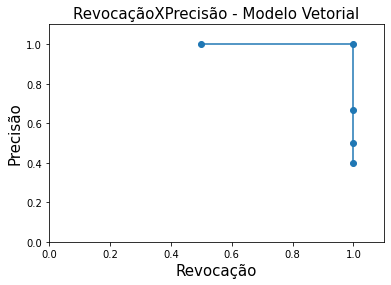

In [ ]:
# Plotando o gráfico de RevocaçãoXPrecisão para o modelo vetorial
fig = plt.figure()
plt.plot(recall_values_vec, precision_values_vec, marker='o')
plt.title('RevocaçãoXPrecisão - Modelo Vetorial', fontsize=15)
plt.xlabel('Revocação', fontsize=15)
plt.ylabel('Precisão', fontsize=15)
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
fig.show()

In [ ]:
# Calculando os valores de precisão e revocação para o modelo probabilístico
recall_values_bm25 = [recall(ranking_bm25[:i+1].index, R) for i in range(len(M_test))]
precision_values_bm25 = [precision(ranking_bm25[:i+1].index, R) for i in range(len(M_test))]

In [ ]:
recall_values_bm25

[0.5, 0.5, 1.0, 1.0, 1.0]

In [ ]:
precision_values_bm25

[1.0, 0.5, 0.6666666666666666, 0.5, 0.4]

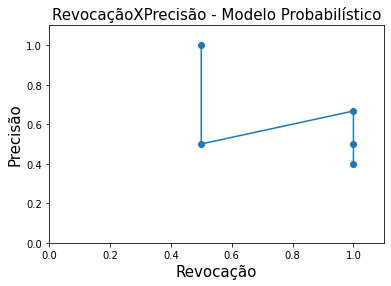

In [ ]:
# Plotando o gráfico de RevocaçãoXPrecisão para o modelo probabilístico
fig = plt.figure()
plt.plot(recall_values_bm25, precision_values_bm25, marker='o')
plt.title('RevocaçãoXPrecisão - Modelo Probabilístico', fontsize=15)
plt.xlabel('Revocação', fontsize=15)
plt.ylabel('Precisão', fontsize=15)
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
fig.show()

In [ ]:
#Função para calcular a precisão interpolada para os níveis de revocação
def interpolated_precision(recall_vector, precision_vector): 
  interpolated_precision_vector = precision_vector
  for i in range(len(recall_vector)):
    current_precision = precision_vector[i]
    for j in range(len(recall_vector)):
      if(recall_vector[j] >= recall_vector[i] and precision_vector[j] > current_precision):
        current_precision = precision_vector[j]
    interpolated_precision_vector[i] = current_precision

  return interpolated_precision_vector

In [ ]:
interpolated_precision_values_vec = interpolated_precision(recall_values_vec, precision_values_vec)
interpolated_precision_values_bm25 = interpolated_precision(recall_values_bm25, precision_values_bm25)

In [ ]:
interpolated_precision_values_vec

[1.0, 1.0, 1.0, 1.0, 1.0]

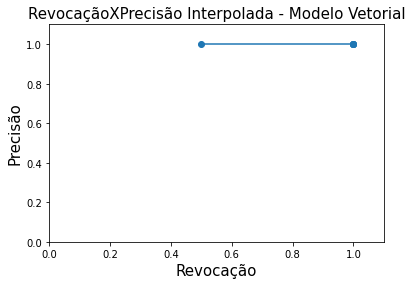

In [ ]:
# Plotando o gráfico de RevocaçãoXPrecisão para o modelo vetorial
fig = plt.figure()
plt.plot(recall_values_vec, interpolated_precision_values_vec, marker='o')
plt.title('RevocaçãoXPrecisão Interpolada - Modelo Vetorial', fontsize=15)
plt.xlabel('Revocação', fontsize=15)
plt.ylabel('Precisão', fontsize=15)
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
fig.show()

In [ ]:
interpolated_precision_values_bm25

[1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]

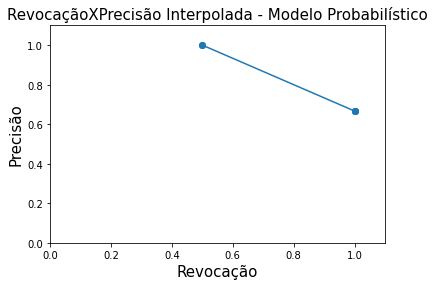

In [ ]:
fig = plt.figure()
plt.plot(recall_values_bm25, interpolated_precision_values_bm25, marker='o')
plt.title('RevocaçãoXPrecisão Interpolada - Modelo Probabilístico', fontsize=15)
plt.xlabel('Revocação', fontsize=15)
plt.ylabel('Precisão', fontsize=15)
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
fig.show()

In [ ]:
# Função para calcular a precisão média
def map(ranking, relevant):
  map = 0
  for i in range(len(ranking)):
    if(ranking[i] in relevant):
      map += precision(ranking[:i + 1], relevant)
  
  return map/len(relevant)

In [ ]:
map_vec = map(list(ranking_sim.index), R)
map_bm25 = map(list(ranking_bm25.index), R)

In [ ]:
print('Precisão Média da consulta no modelo vetorial:', map_vec)

Precisão Média da consulta no modelo vetorial: 1.0


In [ ]:
print('Precisão Média da consulta no modelo probabilístico:', map_bm25)

Precisão Média da consulta no modelo probabilístico: 0.8333333333333333
